In [1]:
import numpy as np
from photutils import CircularAperture
from photutils import DAOStarFinder
from astropy.io import fits
import astropy.units as u
from astropy.nddata import CCDData
from astropy.stats import sigma_clipped_stats, SigmaClip
from astropy.visualization import ImageNormalize, LinearStretch, AsymmetricPercentileInterval
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator
from photutils.background import Background2D, MeanBackground
from photutils import aperture_photometry
from astropy.table import QTable
from astrowidgets import ImageWidget

In [2]:
url = './kelt-16-S001-R001-C001-r.fit'
with fits.open(url) as hdulist:
    hdulist.info()
    data = hdulist[0].data
    header = hdulist[0].header

Filename: ./kelt-16-S001-R001-C001-r.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     585   (4096, 4096)   float32   


In [3]:
# Define the mask
mask = data < -1000
mask[:, 0] = True

In [4]:
unit = u.ct / u.s
xdf_image = CCDData(data, unit=unit, meta=header, mask=mask)

In [5]:
mean, median, std = sigma_clipped_stats(xdf_image.data, sigma=3.0, iters=5, mask=xdf_image.mask)

In [6]:
daofind = DAOStarFinder(fwhm=7, threshold=20.*std, exclude_border=True)
sources_dao = daofind((xdf_image - median)* ~xdf_image.mask)    
print(sources_dao)

 id     xcentroid      ...        flux                 mag         
--- ------------------ ... ------------------ ---------------------
  1  2044.325230452325 ... 11.835702212926325    -2.682985074368285
  2 2143.4894206000413 ...  2.372921670169888   -0.9382085061265245
  3  2524.130215952913 ... 1.3048312822160357   -0.2888858999911708
  4 3074.8044099198532 ...   5.84709435091561   -1.9173502545826946
  5 2204.7327150426086 ...   2.71698138562857   -1.0852166575588154
  6 3491.8243995405055 ...  2.359480072200023   -0.9320407842778251
  7  1676.963305456375 ...  4.546904115832222   -1.6442894899750349
  8 2075.3933831387876 ...  1.780997560455573   -0.6266583114579283
  9  3314.755017003259 ... 27.096886836083502   -3.5822984940149216
 10 1557.8084644119597 ...  6.564960705815824   -2.0430803274733305
...                ... ...                ...                   ...
913  2733.039878972593 ... 1.0320558242786122 -0.034257972686453975
914  279.9762414681361 ...  1.776544049721612   

Text(0,0.5,'Y (pixels)')

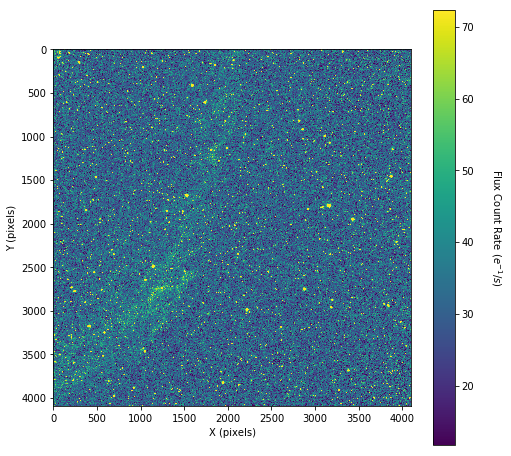

In [7]:
# Set up the figure with subplots
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))

# Plot the data
norm_image = ImageNormalize(xdf_image.data, interval=AsymmetricPercentileInterval(1, 99), stretch=LinearStretch())
xdf_image_clipped = np.clip(xdf_image, 1e-4, None) # clip to plot with logarithmic stretch
fitsplot = ax1.imshow(xdf_image.data, norm=norm_image)

# Define the colorbar and fix the labels
cbar = plt.colorbar(fitsplot)
labels = ['$10^{-4}$'] + [''] * 8 + ['$10^{-3}$'] + [''] * 8 + ['$10^{-2}$']
#cbar.ax.set_yticklabels(labels)

# Define labels
cbar.set_label(r'Flux Count Rate ($e^{-1}/s$)', rotation=270, labelpad=30)
ax1.set_xlabel('X (pixels)')
ax1.set_ylabel('Y (pixels)')

Text(0.5,1,'DAOFind Sources')

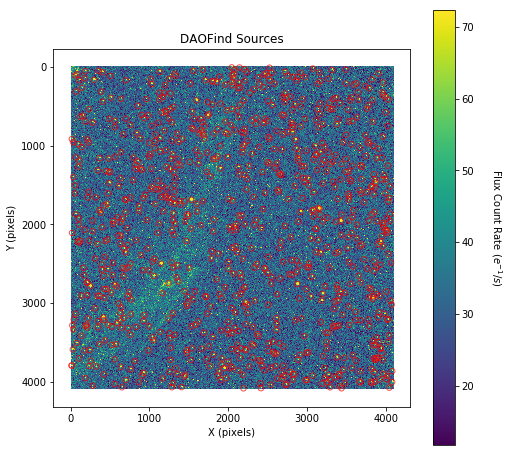

In [8]:
# Set up the figure with subplots
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))

# Plot the data
fitsplot = ax1.imshow(np.ma.masked_where(xdf_image.mask, xdf_image_clipped), norm=norm_image)
ax1.scatter(sources_dao['xcentroid'], sources_dao['ycentroid'], s=30, marker='o', 
            lw=1, alpha=0.7, facecolor='None', edgecolor='r')

# Define the colorbar and fix the labels
cbar = plt.colorbar(fitsplot)
labels = ['$10^{-4}$'] + [''] * 8 + ['$10^{-3}$'] + [''] * 8 + ['$10^{-2}$']
#cbar.ax.set_yticklabels(labels)

# Define labels
cbar.set_label(r'Flux Count Rate ($e^{-1}/s$)', rotation=270, labelpad=30)
ax1.set_xlabel('X (pixels)')
ax1.set_ylabel('Y (pixels)')
ax1.set_title('DAOFind Sources')

In [9]:
sources_dao

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,2044.325230452325,5.741330113242049,0.4889685497643942,0.05939977677467455,0.031170282297437273,81.0,0.0,1336.5931396484375,11.835702212926325,-2.682985074368285
2,2143.4894206000413,6.706449416762725,0.43506598343835223,0.06525348519312621,0.012876029532888831,81.0,0.0,259.862548828125,2.372921670169888,-0.9382085061265245
3,2524.130215952913,9.670052962383972,0.5537993559753607,-0.045070111422929084,0.05658247206862194,81.0,0.0,156.7415771484375,1.3048312822160357,-0.2888858999911708
4,3074.8044099198532,20.874542877309075,0.3900502281485953,-0.10828100404301882,0.17096853055419384,81.0,0.0,628.27783203125,5.84709435091561,-1.9173502545826946
5,2204.7327150426086,26.985324139529098,0.4344677357635227,0.09360081086901702,0.0331854137579812,81.0,0.0,281.9356689453125,2.71698138562857,-1.0852166575588154
6,3491.8243995405055,34.61671198941099,0.5193678456202864,-0.1252693363083876,0.35033404510908694,81.0,0.0,285.45318603515625,2.359480072200023,-0.9320407842778251
7,1676.963305456375,35.45486018262755,0.4396129995395775,0.2046038909157532,0.02808316321320377,81.0,0.0,490.5992431640625,4.546904115832222,-1.6442894899750349
8,2075.3933831387876,35.222195858543465,0.38848820338846657,0.12489810592369864,0.029966681371798882,81.0,0.0,178.00140380859375,1.780997560455573,-0.6266583114579283
9,3314.755017003259,39.29417289958027,0.4288130533295211,-0.1615313613397209,0.20190434689363193,81.0,0.0,2969.99462890625,27.096886836083502,-3.5822984940149216


In [10]:
# define the aperture
position = (sources_dao['xcentroid'], sources_dao['ycentroid'])
radius = 10.
circular_aperture = CircularAperture(position, r=radius)

Text(0.5,1,'Circular Apertures')

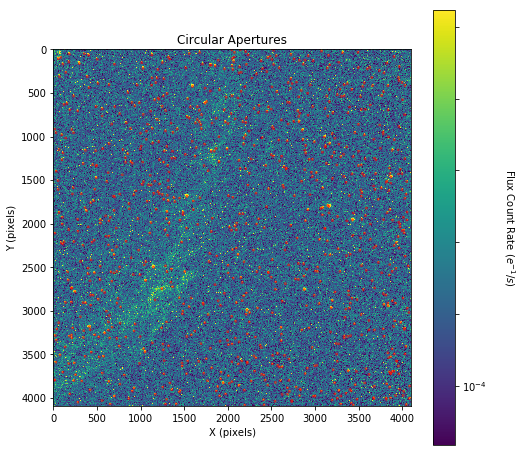

In [11]:
# Set up the figure with subplots
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))

# Plot the data
fitsplot = ax1.imshow(np.ma.masked_where(xdf_image.mask, xdf_image_clipped), norm=norm_image)

# Plot the apertures
circular_aperture.plot(color='red', alpha=0.7)

# Define the colorbar
cbar = plt.colorbar(fitsplot)
labels = ['$10^{-4}$'] + [''] * 8 + ['$10^{-3}$'] + [''] * 8 + ['$10^{-2}$']
cbar.ax.set_yticklabels(labels)

# Define labels
cbar.set_label(r'Flux Count Rate ($e^{-1}/s$)', rotation=270, labelpad=30)
ax1.set_xlabel('X (pixels)')
ax1.set_ylabel('Y (pixels)')
ax1.set_title('Circular Apertures')

# Crop to show an inset of the data
#ax1.set_xlim(2000, 3000)
#ax1.set_ylim(2000, 1000)

In [12]:
phot_table = aperture_photometry(xdf_image, circular_aperture)
print(phot_table)

 id      xcenter            ycenter          aperture_sum   
           pix                pix               ct / s      
--- ------------------ ------------------ ------------------
  1  2044.325230452325  5.741330113242049    68629.557267091
  2 2143.4894206000413  6.706449416762725  22763.15118824091
  3  2524.130215952913  9.670052962383972 16746.282965861312
  4 3074.8044099198532 20.874542877309075  44109.40751918129
  5 2204.7327150426086 26.985324139529098 23487.544362855704
  6 3491.8243995405055  34.61671198941099 25252.312294725292
  7  1676.963305456375  35.45486018262755 34000.693038157224
  8 2075.3933831387876 35.222195858543465 19471.231923747604
  9  3314.755017003259  39.29417289958027 166938.69225725826
 10 1557.8084644119597  49.05260480999153  43947.67187878357
...                ...                ...                ...
914  279.9762414681361 4047.8427781892283  25526.86508128418
915   3415.80400855535 4056.2477594507222 19899.049339757912
916 1407.5226576034217 4

In [13]:
from photutils import aperture_photometry
from photutils import CircularAnnulus
from astropy.table import QTable

In [14]:
r_in = 15.  # approximate isophotal extent of inner semimajor axis
r_out = 25.  # approximate isophotal extent of inner semimajor axis

positions = []
# Create the apertures
circular_annuli = []
for obj in sources_dao:
    position = (obj['xcentroid'], obj['ycentroid'])
    positions.append(position)
    a_in = r_in
    a_out = r_out
    #b_out = obj.semiminor_axis_sigma.value * r_out
    #theta = obj.orientation.value
    circular_annuli.append(CircularAnnulus(position, a_in, a_out))

Text(0.5,1,'Circular Annuli')

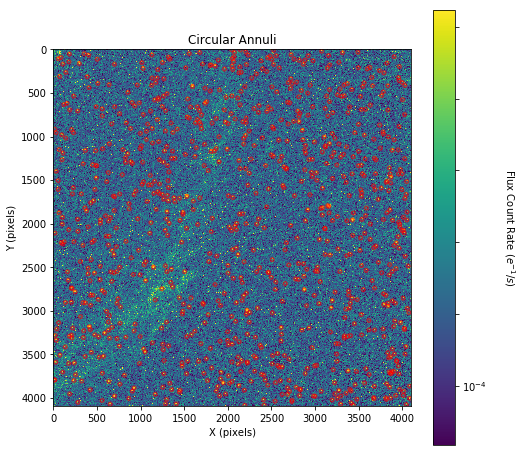

In [15]:
# Set up the figure with subplots
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))

# Plot the data
fitsplot = ax1.imshow(np.ma.masked_where(xdf_image.mask, xdf_image_clipped), norm=norm_image)

# Plot the apertures
for aperture in circular_annuli:
    aperture.plot(color='red', alpha=0.4, ax=ax1, fill=True)

# Define the colorbar
cbar = plt.colorbar(fitsplot)
labels = ['$10^{-4}$'] + [''] * 8 + ['$10^{-3}$'] + [''] * 8 + ['$10^{-2}$']
cbar.ax.set_yticklabels(labels)

# Define labels
cbar.set_label(r'Flux Count Rate ($e^{-1}/s$)', rotation=270, labelpad=30)
ax1.set_xlabel('X (pixels)')
ax1.set_ylabel('Y (pixels)')
ax1.set_title('Circular Annuli')

# Crop to show an inset of the data
#ax1.set_xlim(2000, 3000)
#ax1.set_ylim(2000, 1000)

In [16]:
iw = ImageWidget()
iw.load_fits("kelt-16-S001-R001-C001-r.fit")

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [22]:
iw.reset_markers()
iw.marker = {'type': 'circle', 'color': 'lightgreen', 'radius': 20}
iw.add_markers(sources_dao, x_colname='xcentroid', y_colname='ycentroid')
iw

ImageWidget(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\x…

In [18]:
len(circular_annuli)

923

Text(0,0.5,'Aperture Sum ($e^{-1}/s$)')

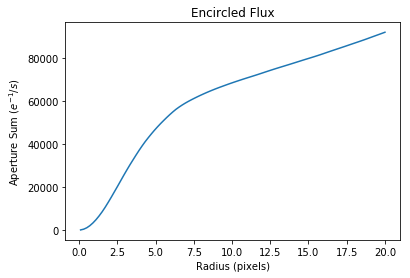

In [19]:
# multiple apertures at a single position
radii = np.linspace(0.1, 20, 100)
flux = []
for r in radii:
    ap = CircularAperture(positions[0], r=r)
    phot = aperture_photometry(data, ap)
    flux.append(phot['aperture_sum'][0])
    
plt.plot(radii, flux)
plt.title('Encircled Flux')
plt.xlabel('Radius (pixels)')
plt.ylabel('Aperture Sum ($e^{-1}/s$)')

In [20]:
bkg_apertures = CircularAnnulus(positions, r_in=15., r_out=25.)

# measure the aperture sums in both apertures# measu 
phot = aperture_photometry(data, circular_aperture)
bkg = aperture_photometry(data, bkg_apertures)


# calculate the mean background level (per pixel) in the annuli# calcu 
bkg_mean = bkg['aperture_sum'] / bkg_apertures.area()
bkg_mean

# now calculate the total background in the circular aperture
bkg_sum = bkg_mean * circular_aperture.area()

phot['bkg_sum'] = bkg_sum
phot

# subtract the background
flux_bkgsub = phot['aperture_sum'] - bkg_sum

phot['aperture_sum_bkgsub'] = flux_bkgsub
phot

id,xcenter,ycenter,aperture_sum,bkg_sum,aperture_sum_bkgsub
,pix,pix,,,
int32,float64,float64,float64,float64,float64
1,2044.325230452325,5.741330113242049,68629.557267091,6715.165565471983,61914.391701619024
2,2143.4894206000413,6.706449416762725,22763.15118824091,6732.788770897232,16030.362417343678
3,2524.130215952913,9.670052962383972,16746.282965861312,6546.499236605443,10199.783729255869
4,3074.8044099198532,20.874542877309075,44109.40751918129,9223.950866838242,34885.45665234305
5,2204.7327150426086,26.985324139529098,23487.544362855704,10253.276684861128,13234.267677994576
6,3491.8243995405055,34.61671198941099,25252.312294725292,9901.930641087241,15350.381653638051
7,1676.963305456375,35.45486018262755,34000.693038157224,10164.754668301146,23835.938369856078
8,2075.3933831387876,35.222195858543465,19471.231923747604,10813.704020745568,8657.527903002036
